## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on= "Mouse ID" )
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df1= df[["Mouse ID", "Timepoint"]]
duplicateRowsDF = df1[df1.duplicated()]
duplicateRowsDF.head()

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = False)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1883

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_tumor_volume = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]


median_tumor_volume = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

variance_tumor_volume = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

standard_deviation_tumor_volume = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

SEM_tumor_volume = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]




In [8]:
df2 = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, "Tumor Volume Variance": variance_tumor_volume, "Tumor Volume Std. Dev.": standard_deviation_tumor_volume, "Tumor Volume Std. Err.": SEM_tumor_volume})
df2

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0.5, 1.0, 'treatment per number of mice')

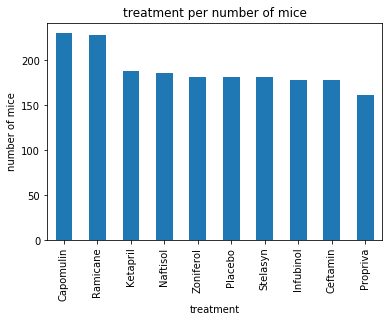

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
pl = df["Drug Regimen"].value_counts()
bar = pl.plot(kind= "bar")
bar.set_xlabel("treatment")
bar.set_ylabel("number of mice")
bar.set_title("treatment per number of mice")



<BarContainer object of 1883 artists>

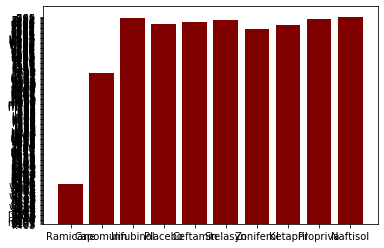

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = clean_df["Drug Regimen"]
y_axis = clean_df["Mouse ID"]
plt.bar(x_axis, y_axis, color = "#800000", align='center')



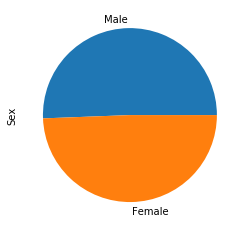

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pl2 = df["Sex"].value_counts()
pie = pl2.plot(kind = "pie")
#pie.set_title("mice-sex")
autopct='%.2f'
# how can i show the % ?

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_df["Sex"].value_counts()

Male      958
Female    925
Name: Sex, dtype: int64

Text(0.5, 1.0, 'mice-sex')

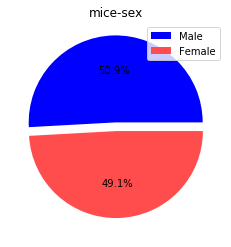

In [14]:
labels = ["Male", "Female"]
sizes = ["958", "925"]
colors = ["blue", "#ff4d4d"]
explode = [0.1, 0]
plt.pie(sizes, colors= colors, explode= explode, autopct= "%1.1f%%")
plt.legend(labels, loc="best")
plt.title("mice-sex")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
a = clean_df.groupby("Mouse ID").max()["Timepoint"]
a = a.reset_index()
a.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge2 = pd.merge(a, clean_df, on= ["Mouse ID", "Timepoint"])
merge2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
merge2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
TumorData_list= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. merge2.loc[merge2['Drug Regimen']== treatment, 'Tumor Volume (mm3)']
merge2.loc[merge2['Drug Regimen']== "Capomulin", 'Tumor Volume (mm3)']
for treatment in treatments_list:
    treatment_data = merge2.loc[merge2['Drug Regimen']== treatment, 'Tumor Volume (mm3)']
    TumorData_list.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    

    #quartiles = merge2["Drug Regimen"].quantile([.25,.5,.75]) 

    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #outliers =  > or <
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

            

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


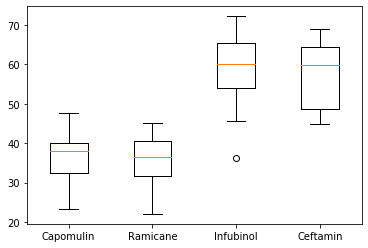

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(TumorData_list, labels = treatments_list)
plt.show()

## Line and Scatter Plots

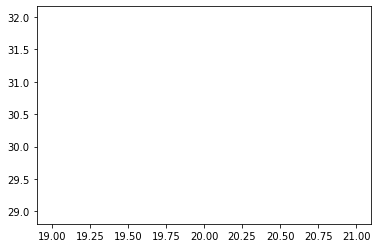

In [29]:
data = merge2.loc[merge2['Drug Regimen'] == "Capomulin"]
mouse = data.loc[data['Mouse ID']== "f966"]
x=mouse['Timepoint']
y=mouse['Tumor Volume (mm3)']
plt.plot(x,y)
plt.show()

In [24]:
mouse.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [25]:
data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


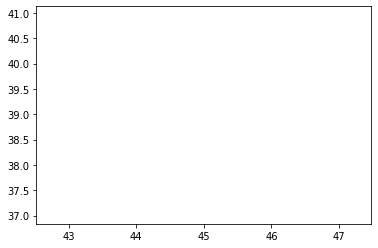

19    45
Name: Timepoint, dtype: int64
19    38.982878
Name: Tumor Volume (mm3), dtype: float64


In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

data = merge2.loc[merge2['Drug Regimen'] == "Capomulin"]
mouse = data.loc[data['Mouse ID']== "b128"]
x=mouse["Timepoint"]
y=mouse["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.show()
print(x)
print(y)

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
